In [59]:
# Dependencies and Setup
import pandas as pd
import numpy as np
import gmaps
import matplotlib.pyplot as plt

from config import (gkey)
gmaps.configure(api_key=gkey)

# File to Load 
covid19_with_pop_land = "Covid_march15_withPopulation_land.csv"

# Read covid19 file and store into Pandas data frame
covid19_df = pd.read_csv(covid19_with_pop_land)
covid19_df

,LOC_id,ISOALPHA,COUNTRYNM,NAME1,Confirmed,Deaths,Recovered,Latitude,Longitude,population,land,risk_Permillion
0,1,AFG,Afghanistan,NaN,16,0,0,33.9391,67.7100,36442712,640733.2562,0.44
1,2,ALB,Albania,NaN,42,1,0,41.1533,20.1683,2935139,28195.68869,14.31
2,3,DZA,Algeria,NaN,48,4,12,28.0339,1.6596,43007779,2315206.619,1.12
3,4,AND,Andorra,NaN,1,0,1,42.5063,1.5218,69654,452.0699393,14.36
4,5,ATG,Antigua and Barbuda,NaN,1,0,0,17.0608,-61.7964,96412,430.6744232,10.37
...,...,...,...,...,...,...,...,...,...,...,...,...
251,252,VIR,United States Virgin Islands,NaN,1,0,0,18.3358,-64.8963,107016,362.5222542,9.34
252,197,URY,Uruguay,NaN,4,0,0,-32.5228,-55.7658,3494819,174772.9719,1.14
253,254,UZB,Uzbekistan,NaN,1,0,0,41.3775,64.5853,31767437,428650.2341,0.03
254,255,VEN,Venezuela (Bolivarian Republic of),NaN,10,0,0,6.4238,-66.5897,33116328,905593.4328,0.3


In [41]:
grouped_covid19_df = covid19_df.groupby("COUNTRYNM").sum().reset_index()
grouped_covid19_df

,COUNTRYNM,LOC_id,Confirmed,Deaths,Recovered,Latitude,Longitude
0,Afghanistan,1,16,0,0,33.9391,67.7100
1,Albania,2,42,1,0,41.1533,20.1683
2,Algeria,3,48,4,12,28.0339,1.6596
3,Andorra,4,1,0,1,42.5063,1.5218
4,Antigua and Barbuda,5,1,0,0,17.0608,-61.7964
...,...,...,...,...,...,...,...
153,United States Virgin Islands,252,1,0,0,18.3358,-64.8963
154,Uruguay,197,4,0,0,-32.5228,-55.7658
155,Uzbekistan,254,1,0,0,41.3775,64.5853
156,Venezuela (Bolivarian Republic of),255,10,0,0,6.4238,-66.5897


In [5]:
# Read Multi-dimentional poverity index file and store into Pandas data frame

multi_poverty_index = "mpi_table_2019_final_0_clean_sheet1.csv"
mpi_df = pd.read_csv(multi_poverty_index)
mpi_df

,Country,Yr and Survey 2007-2018,Index Value,Headcount (%),Intensity of deprivation(%),# of poor (thousands),# of poor 2017 (thousands),Inequality among poor -Value,Population in severe multi poverty (%),Population vunerable to multi poverty (%),Health Contrib to Poverty (%),Education Contrib to Poverty %,Standard of living %,National Poverty Line % - 2007-2018,PPP $1.90/day $ 2007-2017
0,Afghanistan,2015/2016 D,0.272,55.9,48.6,"19,376","19,865",0.02,24.9,18.1,10.0,45.0,45.0,54.5,NaN
1,Albania,2017/2018 D,0.003,0.7,39.1,21,21,..,0.1,5.0,28.3,55.1,16.7,14.3,1.1
2,Algeria,2012/2013 M,0.008,2.1,38.8,805,868,0.006,0.3,5.8,29.9,46.8,23.2,5.5,0.5
3,Angola,2015/2016 D,0.282,51.1,55.3,"14,725","15,221",0.024,32.5,15.5,21.2,32.1,46.8,36.6,30.1
4,Armenia,2015/2016 D,0.001,0.2,36.2,5,5,..,0.0,2.7,33.1,36.8,30.1,25.7,1.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,Vanuatu,2007 M,0.174,38.8,44.9,85,107,0.012,10.2,32.3,21.4,22.5,56.2,12.7,13.1
97,Viet Nam,2013/2014 M,0.019,4.9,39.5,"4,530","4,677",0.01,0.7,5.6,15.2,42.6,42.2,9.8,2.0
98,Yemen,2013 D,0.241,47.7,50.5,"12,199","13,475",0.021,23.9,22.1,28.3,30.7,41.0,48.6,18.8
99,Zambia,2013/2014 D,0.261,53.2,49.1,"8,317","9,102",0.017,24.2,22.5,23.7,22.5,53.7,54.4,57.5


In [43]:
merged_df = grouped_covid19_df.merge(mpi_df, how='inner', left_on='COUNTRYNM', right_on='Country')
merged_df

,COUNTRYNM,LOC_id,Confirmed,Deaths,Recovered,Latitude,Longitude,Country,Yr and Survey 2007-2018,Index Value,...,# of poor (thousands),# of poor 2017 (thousands),Inequality among poor -Value,Population in severe multi poverty (%),Population vunerable to multi poverty (%),Health Contrib to Poverty (%),Education Contrib to Poverty %,Standard of living %,National Poverty Line % - 2007-2018,PPP $1.90/day $ 2007-2017
0,Afghanistan,1,16,0,0,33.9391,67.7100,Afghanistan,2015/2016 D,0.272,...,"19,376","19,865",0.02,24.9,18.1,10.0,45.0,45.0,54.5,NaN
1,Albania,2,42,1,0,41.1533,20.1683,Albania,2017/2018 D,0.003,...,21,21,..,0.1,5.0,28.3,55.1,16.7,14.3,1.1
2,Algeria,3,48,4,12,28.0339,1.6596,Algeria,2012/2013 M,0.008,...,805,868,0.006,0.3,5.8,29.9,46.8,23.2,5.5,0.5
3,Armenia,7,26,0,0,40.0691,45.0382,Armenia,2015/2016 D,0.001,...,5,5,..,0.0,2.7,33.1,36.8,30.1,25.7,1.4
4,Bangladesh,20,5,0,0,23.6850,90.3563,Bangladesh,2014 D,0.198,...,"66,468","68,663",0.016,16.7,21.4,23.5,29.2,47.3,24.3,14.8
5,Bhutan,23,1,0,0,27.5142,90.4336,Bhutan,2010 M,0.175,...,272,302,0.016,14.7,17.7,24.2,36.6,39.2,8.2,1.5
6,Bolivia (Plurinational State of),24,10,0,0,-16.2902,-63.5887,Bolivia (Plurinational State of),2008 D,0.094,...,"1,958","2,254",0.014,7.1,15.7,21.6,26.6,51.8,36.4,5.8
7,Bosnia and Herzegovina,25,24,0,0,43.9159,17.6791,Bosnia and Herzegovina,2011/2012 M,0.008,...,80,77,0.002,0.1,4.1,79.7,7.2,13.1,16.9,0.1
8,Brazil,26,162,0,0,-14.2350,-51.9253,Brazil,2015 N,0.016,...,"7,913","8,041",0.008,0.9,6.2,49.8,22.9,27.3,26.5,4.8
9,Burkina Faso,29,3,0,0,12.2383,-1.5616,Burkina Faso,2010 D,0.519,...,"13,083","16,091",0.027,64.8,7.4,20.0,40.6,39.4,40.1,43.7


In [50]:
merged_sorted_df = merged_grouped_df.sort_values(by='Confirmed', ascending=False)
merged_sorted_df.head(20)

,LOC_id,Confirmed,Deaths,Recovered,Latitude,Longitude,Index Value,Headcount (%),Intensity of deprivation(%),Population in severe multi poverty (%),Population vunerable to multi poverty (%),Health Contrib to Poverty (%),Education Contrib to Poverty %,Standard of living %,National Poverty Line % - 2007-2018,PPP $1.90/day $ 2007-2017
COUNTRYNM,,,,,,,,,,,,,,,,
China,59.354839,2608.0,103.193548,2158.903226,33.406935,111.542903,0.016,3.9,41.3,0.3,17.1,35.2,39.2,25.5,3.1,0.7
Brazil,26.000000,162.0,0.000000,0.000000,-14.235000,-51.925300,0.016,3.8,42.5,0.9,6.2,49.8,22.9,27.3,26.5,4.8
Philippines,161.000000,140.0,11.000000,2.000000,12.879700,121.774000,0.024,5.8,41.8,1.3,7.3,20.3,31.0,48.7,21.6,7.8
Indonesia,119.000000,117.0,5.000000,8.000000,-0.789300,113.921300,0.028,7.0,40.3,1.2,9.1,23.2,30.0,46.8,10.6,5.7
Iraq,121.000000,116.0,10.000000,26.000000,33.223200,43.679300,0.033,8.6,37.9,1.3,5.2,33.1,60.9,6.0,18.9,2.5
Thailand,187.000000,114.0,1.000000,35.000000,15.870000,100.992500,0.003,0.8,39.1,0.1,7.2,35.0,47.4,17.6,8.6,0.0
India,118.000000,113.0,2.000000,13.000000,20.593700,78.962900,0.123,27.9,43.9,8.8,19.3,31.9,23.4,44.8,21.9,21.2
Egypt,92.000000,110.0,2.000000,21.000000,26.820600,30.802500,0.019,5.2,37.6,0.6,6.1,39.8,53.2,7.0,27.8,1.3
Viet Nam,256.000000,56.0,0.000000,16.000000,14.058300,108.277200,0.019,4.9,39.5,0.7,5.6,15.2,42.6,42.2,9.8,2.0


In [44]:
reduced_df = merged_grouped_df[['Confirmed','Deaths','Recovered','Intensity of deprivation(%)',
                                'Population in severe multi poverty (%)',
                                'Health Contrib to Poverty (%)',
                                'Education Contrib to Poverty %']].reset_index()
reduced_df


,COUNTRYNM,Confirmed,Deaths,Recovered,Intensity of deprivation(%),Population in severe multi poverty (%),Health Contrib to Poverty (%),Education Contrib to Poverty %
0,Afghanistan,16.0,0.000000,0.000000,48.6,24.9,10.0,45.0
1,Albania,42.0,1.000000,0.000000,39.1,0.1,28.3,55.1
2,Algeria,48.0,4.000000,12.000000,38.8,0.3,29.9,46.8
3,Armenia,26.0,0.000000,0.000000,36.2,0.0,33.1,36.8
4,Bangladesh,5.0,0.000000,0.000000,47.5,16.7,23.5,29.2
5,Bhutan,1.0,0.000000,0.000000,46.8,14.7,24.2,36.6
6,Bolivia (Plurinational State of),10.0,0.000000,0.000000,46.0,7.1,21.6,26.6
7,Bosnia and Herzegovina,24.0,0.000000,0.000000,37.9,0.1,79.7,7.2
8,Brazil,162.0,0.000000,0.000000,42.5,0.9,49.8,22.9
9,Burkina Faso,3.0,0.000000,0.000000,61.9,64.8,20.0,40.6


In [45]:
reduced_df.describe()

,Confirmed,Deaths,Recovered,Intensity of deprivation(%),Population in severe multi poverty (%),Health Contrib to Poverty (%),Education Contrib to Poverty %
count,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000
mean,72.155172,2.503337,39.705228,44.106897,10.803448,31.862069,31.265517
std,341.179471,13.614646,283.227942,6.515053,15.631255,17.176737,12.561520
min,1.000000,0.000000,0.000000,34.400000,0.000000,10.000000,3.100000
25%,2.000000,0.000000,0.000000,39.125000,0.525000,21.625000,23.400000
50%,8.500000,0.000000,0.000000,42.500000,2.050000,26.650000,30.450000
75%,41.750000,0.000000,1.000000,46.700000,14.350000,35.150000,39.425000
max,2608.000000,103.193548,2158.903226,61.900000,64.800000,90.400000,60.900000


Text(0, 0.5, 'Intensity of Deprivation %')

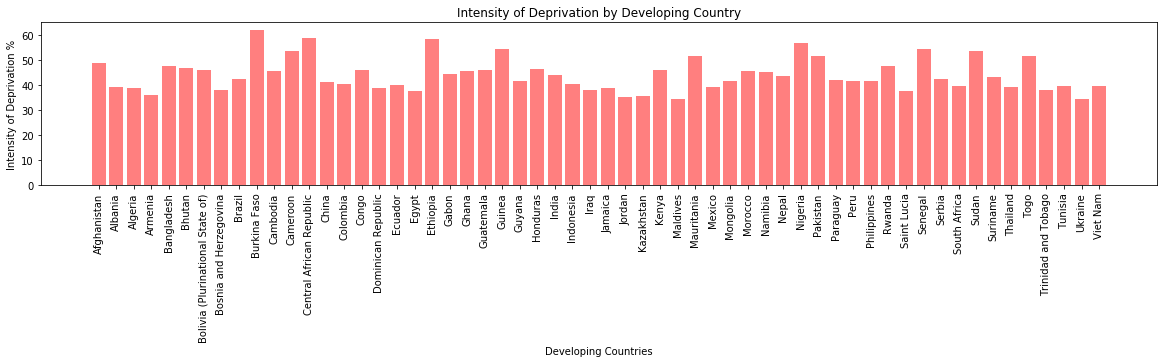

In [46]:
# Create a bar chart showing Intensity of Deprivation by Country - based on the Global Multidimensional Poverty Index

x_axis = np.arange(len(reduced_df))
tick_locations = [value for value in x_axis]

# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(20,3))
plt.bar(x_axis, reduced_df["Intensity of deprivation(%)"], color='r', alpha=0.5, align="center")
plt.xticks(tick_locations, reduced_df["COUNTRYNM"], rotation="vertical")
plt.title("Intensity of Deprivation by Developing Country")
plt.xlabel("Developing Countries")
plt.ylabel("Intensity of Deprivation %")

Text(0, 0.5, 'Population in severe multi poverty %')

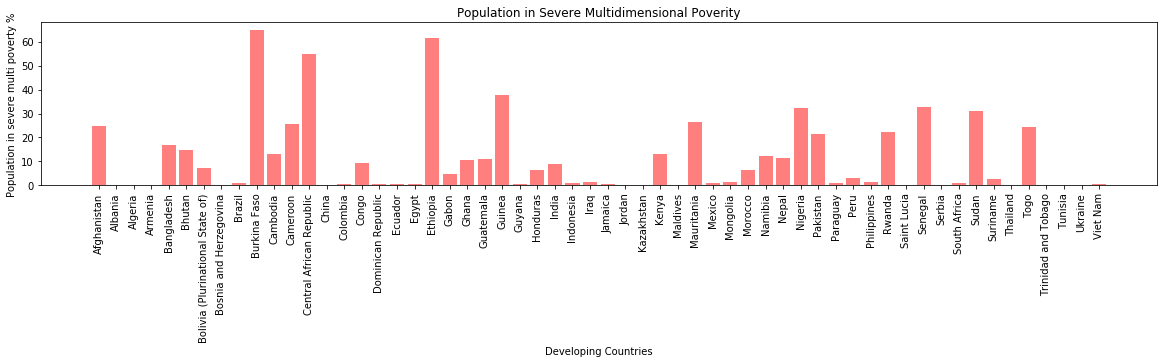

In [47]:
# Create a bar chart showing % of population in severe multi poverty by Country 
# based on the Global Multidimensional Poverty Index

x_axis = np.arange(len(reduced_df))
tick_locations = [value for value in x_axis]

# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(20,3))
plt.bar(x_axis, reduced_df["Population in severe multi poverty (%)"], color='r', alpha=0.5, align="center")
plt.xticks(tick_locations, reduced_df["COUNTRYNM"], rotation="vertical")
plt.title("Population in Severe Multidimensional Poverity")
plt.xlabel("Developing Countries")
plt.ylabel("Population in severe multi poverty %")

Text(0, 0.5, 'Healty Contribution to Poverty %')

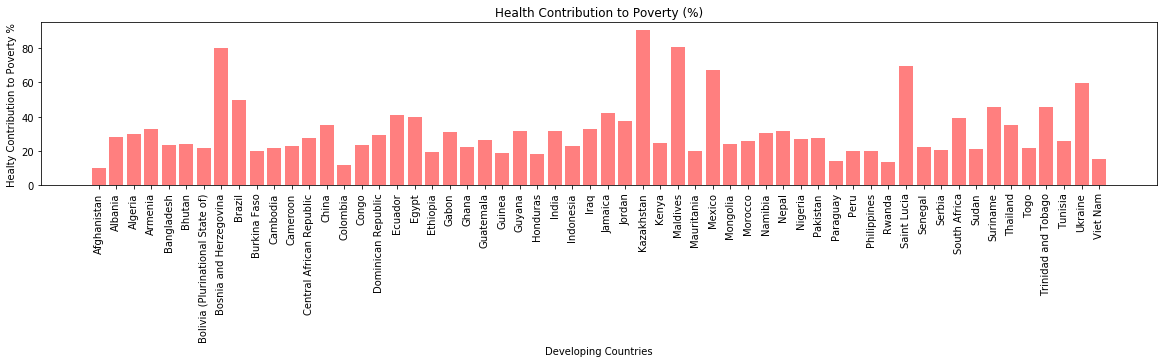

In [48]:
# Create a bar chart showing health contribution to poverty by Country 
# based on the Global Multidimensional Poverty Index

x_axis = np.arange(len(reduced_df))
tick_locations = [value for value in x_axis]

# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(20,3))
plt.bar(x_axis, reduced_df["Health Contrib to Poverty (%)"], color='r', alpha=0.5, align="center")
plt.xticks(tick_locations, reduced_df["COUNTRYNM"], rotation="vertical")
plt.title("Health Contribution to Poverty (%)")
plt.xlabel("Developing Countries")
plt.ylabel("Healty Contribution to Poverty %")

Text(0, 0.5, 'Education Contribution to Poverty %')

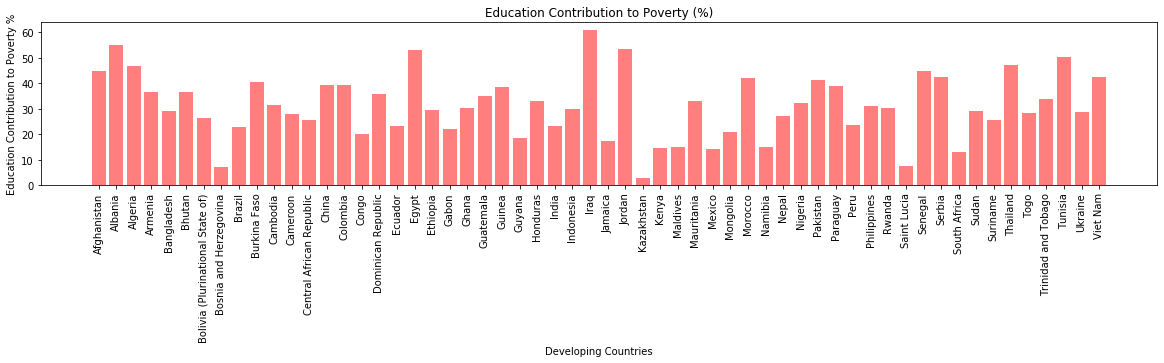

In [49]:
# Create a bar chart showing education contribution to poverty by Country 
# based on the Global Multidimensional Poverty Index

x_axis = np.arange(len(reduced_df))
tick_locations = [value for value in x_axis]

# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(20,3))
plt.bar(x_axis, reduced_df["Education Contrib to Poverty %"], color='r', alpha=0.5, align="center")
plt.xticks(tick_locations, reduced_df["COUNTRYNM"], rotation="vertical")
plt.title("Education Contribution to Poverty (%)")
plt.xlabel("Developing Countries")
plt.ylabel("Education Contribution to Poverty %")

In [55]:
# Read passenger airline travel file and store into Pandas data frame

pass_summ = "2017_passenger_summary.csv"
pass_summ_df = pd.read_csv(pass_summ)
pass_summ_df

,Ranking,Airport,Passenger Number,Lat,Lng
0,1,"ATLANTA GA, US (ATL)",103902992,33.6407,84.4277
1,2,"BEIJING, CN (PEK)",95786442,40.0799,116.6031
2,3,"DUBAI, AE (DXB)",88242099,25.2532,55.3657
3,4,"TOKYO, JP (HND)",85408975,35.5494,139.7798
4,5,"LOS ANGELES CA, US (LAX)",84557968,33.9416,118.4085
5,6,"CHICAGO IL, US (ORD)",79828183,41.9742,87.9073
6,7,"LONDON, GB (LHR)",78014598,43.0286,81.1499
7,8,"HONG KONG, HK (HKG)",72664075,22.3080,113.9185
8,9,"SHANGHAI, CN (PVG)",70001237,31.1443,121.8083
9,10,"PARIS, FR (CDG)",69471442,49.0097,2.5479


In [56]:
# Store Covid19 'Lat' and 'Lng' into  locations and store # confirmed cases
covid19_locs = covid19_df[["Latitude", "Longitude"]]
confirmed_cases = covid19_df["Confirmed"]
confirmed_cases

0      16
1      42
2      48
3       1
4       1
       ..
251     1
252     4
253     1
254    10
255    56
Name: Confirmed, Length: 256, dtype: int64

In [60]:
# Create a 'Confirmed' Heatmap layer
fig = gmaps.figure()

heat_layer = gmaps.heatmap_layer(covid19_locs, weights=confirmed_cases, 
                                 dissipating=False, max_intensity=100,
                                 point_radius = 1)
fig.add_layer(heat_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [63]:
# Store Airport 'Lat' and 'Lng' into  locations and store airport name

airport_locs = pass_summ_df[["Lat", "Lng"]]
airport = pass_summ_df["Airport"]

airport_list = pass_summ_df["Airport"].tolist()
#airport_list

['ATLANTA GA, US (ATL)',
 'BEIJING, CN (PEK)',
 'DUBAI, AE (DXB)',
 'TOKYO, JP (HND)',
 'LOS ANGELES CA, US (LAX)',
 'CHICAGO IL, US (ORD)',
 'LONDON, GB (LHR)',
 'HONG KONG, HK (HKG)',
 'SHANGHAI, CN (PVG)',
 'PARIS, FR (CDG)',
 'AMSTERDAM, NL (AMS)',
 'DALLAS/FORT WORTH TX, US (DFW)',
 'GUANGZHOU, CN (CAN)',
 'FRANKFURT, DE (FRA)',
 'ISTANBUL, TR (IST)',
 'NEW DELHI, IN (DEL)',
 'JAKARTA, ID (CGK)',
 'SINGAPORE, SG (SIN)',
 'INCHEON, KR (ICN)',
 'DENVER CO, US (DEN)']

In [66]:
# Create Airport layer
airport_layer = gmaps.symbol_layer(
    airport_locs, fill_color='rgba(0, 150, 0, 0.4)',
    stroke_color='rgba(0, 0, 150, 0.4)', scale=3,
#    info_box_content=[f"Bank amount: {airport}"]
    info_box_content=[f"Airport: {airport}" for airport in airport_list]
)

fig = gmaps.figure()
fig.add_layer(airport_layer)

fig

Figure(layout=FigureLayout(height='420px'))

In [67]:
# Create a combined map
fig = gmaps.figure()

fig.add_layer(heat_layer)
fig.add_layer(airport_layer)

fig

Figure(layout=FigureLayout(height='420px'))